## Task

#### Build an EDA of the website performance for Google Merchandise Store. https://shop.googlemerchandisestore.com/
#### Recency, Frequency, Monetary value(RFM) analysis to understand product performance.  - excluded
#### User journey mapping to find key paths the website visitors go through and how can we improve it

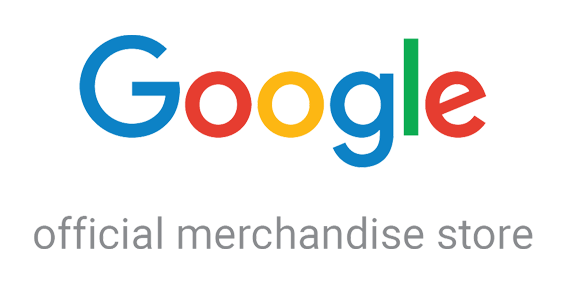


As we have 183 days data from 1/06/2022 to 30/11/2022, I have exported the data from Google Analytics Demo Account, with the following. 

PROBLEMS

- What was the best month for sales? How much was earned that month?
- What source / medium sold the most product?
- What time should we display advertisements to maximize likelihood of customer’s buying products?
- What Products are most often sold together?
- What product sold the most? Why do you think it did?

##### Custom Dimensions 
Year, Month, Day of the Month, Date, Product, Source, Medium, Source / Medium, Transaction ID, Product

##### Metrics
Revenue, Unique Purchases, Quantity, Avg. Price, Avg. QTY, Product Refund Amount


1. Check missing values and data processing
2. Compute statistics on the target variable / Hypothesis Testing
3. Exploratory Data Analysis
4. Features Selection


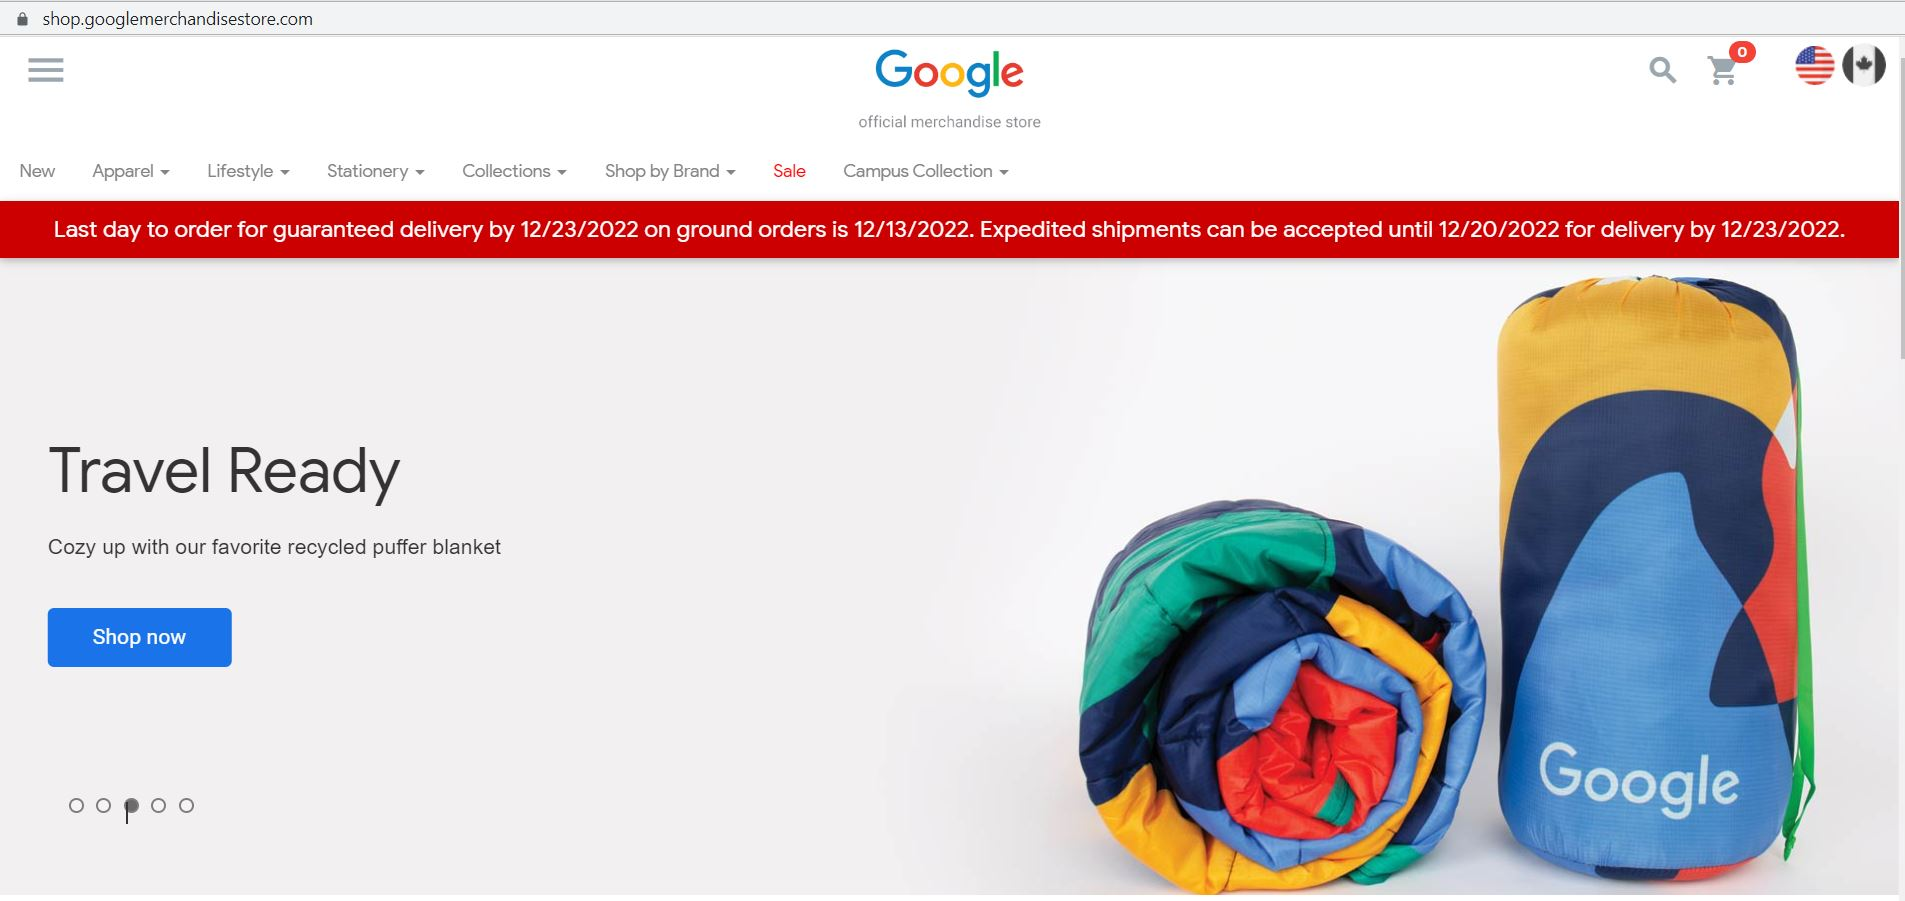

#### What is RFM Analysis?

RFM analysis is basically scoring our customers based on their Recency, Frequency and Monetary values.

Let’s understand what Recency, Frequency and Monetary are.

##### Recency: How recently a customer made a purchase.

For example, If you buy something on January 1th and today is February 1th your recency is 30 days.

##### Frequency: How often customers make a purchase.

This is the number of orders that you made from your first purchase date.

If you buy a t-shirt on January 1th and buy jeans on January 15th Your frequency is 2.

##### Monetary Value: How much money a customer spends on purchases.

Let’s refer to the previous example where you made 2 purchases. The T-shirt costs you 20 $ and the jeans are 35 $, Your monetary value is 55 $.

Note: Sometimes monetary value can be the average spending of each customer.

Now that we understand what Recency, Frequency and Monetary Value are, we can go to our project.

In [191]:
import numpy as np 
import pandas as pd 
from pandas.io.json import json_normalize
import json
import os


#Libraries for plots
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
from IPython.display import HTML
plt.style.use('fivethirtyeight')
sns.set_context(rc = {"lines.linewidth": 6})

import warnings
warnings.filterwarnings('ignore')


In [87]:
!pip install --upgrade google-cloud-bigquery

Requirement already up-to-date: google-cloud-bigquery in c:\users\dell\anaconda3\lib\site-packages (3.4.1)


In [85]:
import os
from google.cloud import bigquery
from google.oauth2 import service_account
credentials = service_account.Credentials.from_service_account_file(
'absolute-realm-372307-3f40243d5f58.json')
project_id = 'bigquery-public-data'
client = bigquery.Client(credentials= credentials,project=project_id)










os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'absolute-realm-372307-3f40243d5f58.json'


sql_query = """
#standardSQL
SELECT
( SUM(total_transactionrevenue_per_user) / SUM(total_visits_per_user) ) AS
avg_revenue_by_user_per_visit
FROM (
SELECT
fullVisitorId,
SUM( totals.visits ) AS total_visits_per_user,
SUM( totals.transactionRevenue ) AS total_transactionrevenue_per_user
FROM
`bigquery-public-data.google_analytics_sample.ga_sessions_*`
WHERE
_TABLE_SUFFIX BETWEEN '20170701' AND '20170731'
AND
totals.visits > 0
AND totals.transactions >= 1
AND totals.transactionRevenue IS NOT NULL
GROUP BY
fullVisitorId )
"""

query_job = client.query(sql_query)

print(query_job.results)

for row in query_job.result():
    row.avg_revenue_by_user_per_visit

Forbidden: 403 POST https://bigquery.googleapis.com/bigquery/v2/projects/bigquery-public-data/jobs?prettyPrint=false: Access Denied: Project bigquery-public-data: User does not have bigquery.jobs.create permission in project bigquery-public-data.

Location: None
Job ID: 82550af9-e921-48ed-a326-4a1932789778


### Initial inspection of the data

In [103]:
df = pd.read_csv("GA Demo Account Data June to Nov 2022.csv")
df.head(10)

Year Month  Day_of_the_Month      Date                         Product  \
0  2022  June                 1  20220601   #IamRemarkable Unisex T-Shirt   
1  2022  June                 1  20220601       Android Commuter Backpack   
2  2022  June                 1  20220601       Android Commuter Backpack   
3  2022  June                 1  20220601          Android Lumberjack Pin   
4  2022  June                 1  20220601  Android SM S/F18 Sticker Sheet   
5  2022  June                 1  20220601            Android Striped Sock   
6  2022  June                 1  20220601    Android Techie 3D Framed Art   
7  2022  June                 1  20220601                  Ball of Whacks   
8  2022  June                 1  20220601                  Ball of Whacks   
9  2022  June                 1  20220601    Chrome Dino Marine Layer Tee   

   Source Medium      Source_Medium  Transaction_ID  Product_Revenue  \
0  direct   none  (direct) / (none)          373524             9.60   
1  direct   none  (direct) / (none)          373573            48.00   
2  direct   none  (direct) / (none)          373585            48.00   
3  direct   none  (direct) / (none)          373606             4.48   
4  direct   none  (direct) / (none)          373270             1.68   
5  direct   none  (direct) / (none)          373325            14.40   
6  direct   none  (direct) / (none)          373604            16.00   
7  direct   none  (direct) / (none)          373322           140.00   
8  direct   none  (direct) / (none)          373630           280.00   
9  direct   none  (direct) / (none)          373401           288.00   

   Unique_Purchases  Quantity  Avg_Price  Avg_QTY  Product_Refund_Amount  \
0                 1         1       9.60        1                      0   
1                 1         1      48.00        1                      0   
2                 1         1      48.00        1                      0   
3                 1         1       4.48        1                      0   
4                 1         1       1.68        1                      0   
5                 1         1      14.40        1                      0   
6                 1         1      16.00        1                      0   
7                 1         4      35.00        4                      0   
8                 1        10      28.00       10                      0   
9                 4         8      36.00        2                      0   

  Date_updated  
0  2022-June-1  
1  2022-June-1  
2  2022-June-1  
3  2022-June-1  
4  2022-June-1  
5  2022-June-1  
6  2022-June-1  
7  2022-June-1  
8  2022-June-1  
9  2022-June-1

In [71]:
df.describe()

Year  Day_of_the_Month          Date  Transaction_ID  \
count  34256.0      34256.000000  3.425600e+04    34256.000000   
mean    2022.0         15.527382  2.022087e+07   403980.977289   
std        0.0          9.135852  1.709405e+02    18209.393645   
min     2022.0          1.000000  2.022060e+07   373228.000000   
25%     2022.0          7.000000  2.022072e+07   388748.000000   
50%     2022.0         15.000000  2.022083e+07   401281.000000   
75%     2022.0         24.000000  2.022102e+07   420928.500000   
max     2022.0         31.000000  2.022113e+07   436576.000000   

       Product_Revenue  Unique_Purchases      Quantity    Avg._Price  \
count     34256.000000      34256.000000  34256.000000  34256.000000   
mean         39.661817          1.039059      3.022419     21.961248   
std         117.295678          0.278230     11.538879     20.889162   
min           0.800000          1.000000      1.000000      0.800000   
25%          10.000000          1.000000      1.000000      6.400000   
50%          20.800000          1.000000      1.000000     17.600000   
75%          42.000000          1.000000      1.000000     26.400000   
max        7200.000000         16.000000    750.000000    155.000000   

           Avg._QTY  Product_Refund_Amount  
count  34256.000000           34256.000000  
mean       2.947863               0.064806  
std       11.494413               8.085184  
min        1.000000               0.000000  
25%        1.000000               0.000000  
50%        1.000000               0.000000  
75%        1.000000               0.000000  
max      750.000000            1400.000000

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34256 entries, 0 to 34255
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Year                       34256 non-null  int64         
 1   Month                      34256 non-null  object        
 2   Day_of_the_Month           34256 non-null  int64         
 3   Date                       34256 non-null  datetime64[ns]
 4   Product                    34256 non-null  object        
 5   Source                     34256 non-null  object        
 6   Medium                     34256 non-null  object        
 7   Source_Medium              34256 non-null  object        
 8   Transaction_ID             34256 non-null  int64         
 9   Product_Revenue            34256 non-null  float64       
 10  Unique_Purchases           34256 non-null  int64         
 11  Quantity                   34256 non-null  int64         
 12  Avg.

#### Columns are categorical, check for unique values of each column

In [42]:
for i in df.columns:
    print(df[i].unique(),"\t",df[i].nunique())

[2022] 	 1
['June' 'July' 'August' 'September' 'October' 'November'] 	 6
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 20 21 22 23 24 25 26 27 28 29 30
 14 15 16 17 18 19 31] 	 31
[20220601 20220602 20220603 20220604 20220605 20220606 20220607 20220608
 20220609 20220610 20220611 20220612 20220613 20220620 20220621 20220622
 20220623 20220624 20220625 20220626 20220627 20220628 20220629 20220630
 20220701 20220702 20220703 20220704 20220705 20220706 20220707 20220708
 20220709 20220710 20220711 20220712 20220713 20220714 20220715 20220716
 20220717 20220718 20220719 20220720 20220721 20220722 20220723 20220724
 20220725 20220726 20220727 20220728 20220729 20220730 20220731 20220801
 20220802 20220803 20220804 20220805 20220806 20220807 20220808 20220809
 20220810 20220811 20220812 20220813 20220814 20220815 20220816 20220817
 20220818 20220819 20220820 20220821 20220822 20220823 20220824 20220825
 20220826 20220827 20220828 20220829 20220830 20220831 20220901 20220902
 20220903 20220904 2022

#### Check how these unique categories are distributed among the columns

In [69]:
for i in df.columns:
    print(df[i].value_counts())
    print()

2022    34256
Name: Year, dtype: int64

November     6930
August       6770
July         5602
September    5130
June         4939
October      4885
Name: Month, dtype: int64

28    1552
1     1520
9     1371
7     1325
27    1322
3     1307
22    1277
29    1256
4     1222
21    1211
2     1190
8     1173
6     1168
26    1116
12    1113
10    1104
18    1094
20    1067
30    1062
13    1022
25    1001
15    1000
23     995
11     963
14     951
5      941
19     915
24     888
17     883
16     759
31     488
Name: Day_of_the_Month, dtype: int64

1970-01-01 00:00:00.020221104    536
1970-01-01 00:00:00.020221101    518
1970-01-01 00:00:00.020221103    512
1970-01-01 00:00:00.020221128    434
1970-01-01 00:00:00.020220810    401
                                ... 
1970-01-01 00:00:00.020220911     60
1970-01-01 00:00:00.020220625     59
1970-01-01 00:00:00.020220704     57
1970-01-01 00:00:00.020221015     55
1970-01-01 00:00:00.020220904     48
Name: Date, Length: 177, dtype: int64



#### Check missing values and data processing

In [44]:
# find the null values
df.isnull().sum()

Year                     0
Month                    0
Day_of_the_Month         0
Date                     0
Product                  0
Source                   0
Medium                   0
Source_Medium            0
Transaction_ID           0
Product_Revenue          0
Unique_Purchases         0
Quantity                 0
Avg._Price               0
Avg._QTY                 0
Product_Refund_Amount    0
dtype: int64

In [14]:
# No missing values found for numerical terms & Categorical terms

#### EDA

#### Data Visualization of Categorical Features

### Univariate Analysis

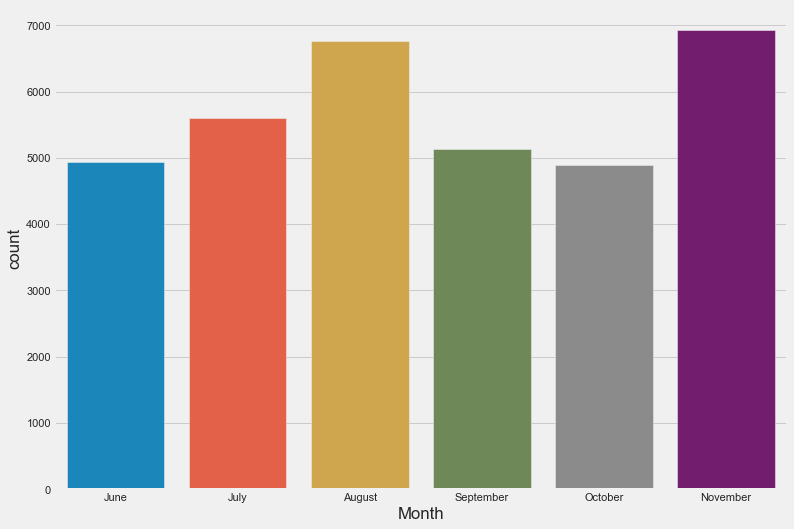

In [196]:
sns.countplot(df['Month'])

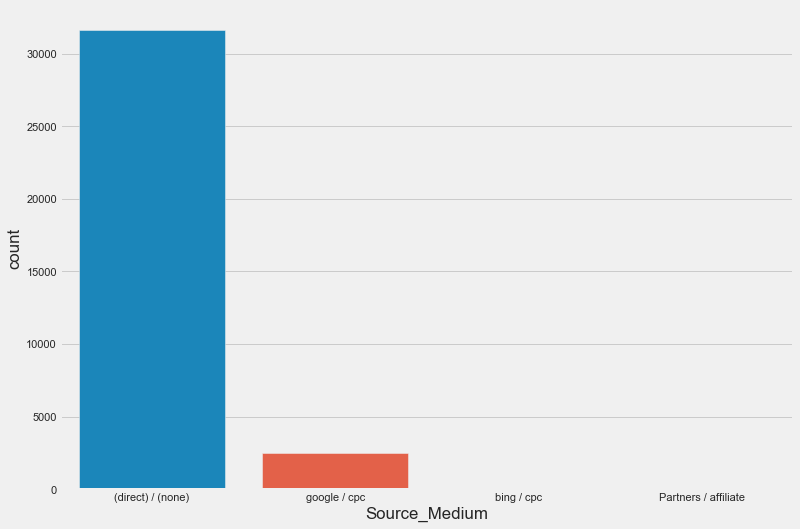

In [197]:
sns.countplot(df['Source_Medium'])

#### Univariate Analysis

Univariate analysis is a standalone analysis of a variable or a column without considering any casual relationships with any other variable and obtaining some insights about the data. The following information has been obtained from the data graphs above.

### Data Visualization with Log Transformation of Numerical Features

We see that the data is not uniformly distributed for the attributes “Product_Revenue”, “Quantity”, “Avg._Price” and “Product_Refund_Amount”. Hence, log transformation is applied to uniformly distribute the data. It’s primarily used to convert skewed distribution to normal distribution. We take the log values of the column and use these values as the column instead for further analysis. The below graph represents the log-transformed data on numerical attributes.

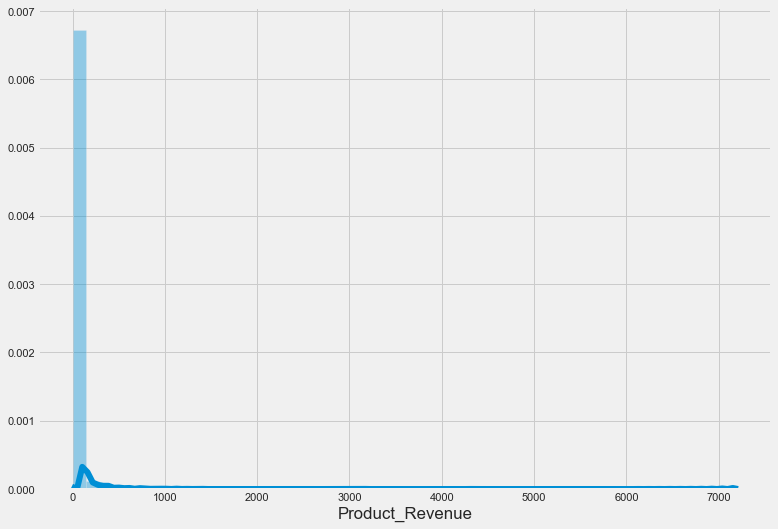

In [198]:
# numerical attributes visualization
sns.distplot(df["Product_Revenue"]);

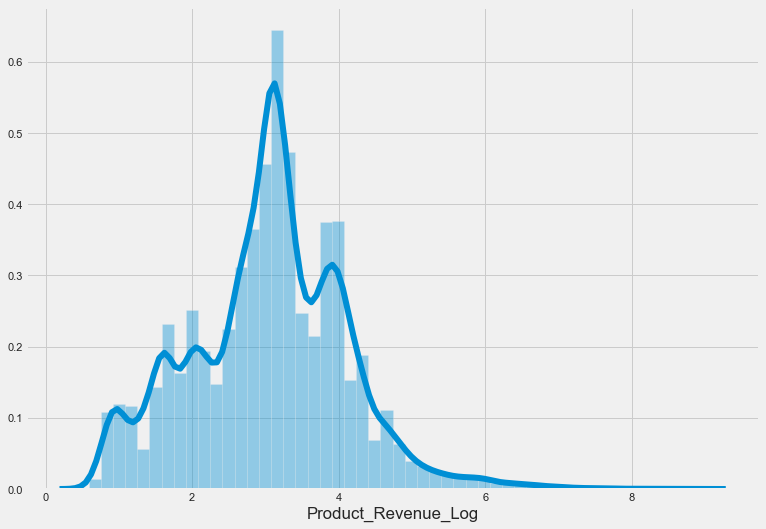

In [199]:
# apply log transformation to the attribute
df['Product_Revenue_Log'] = np.log(df['Product_Revenue']+1)
sns.distplot(df["Product_Revenue_Log"]);

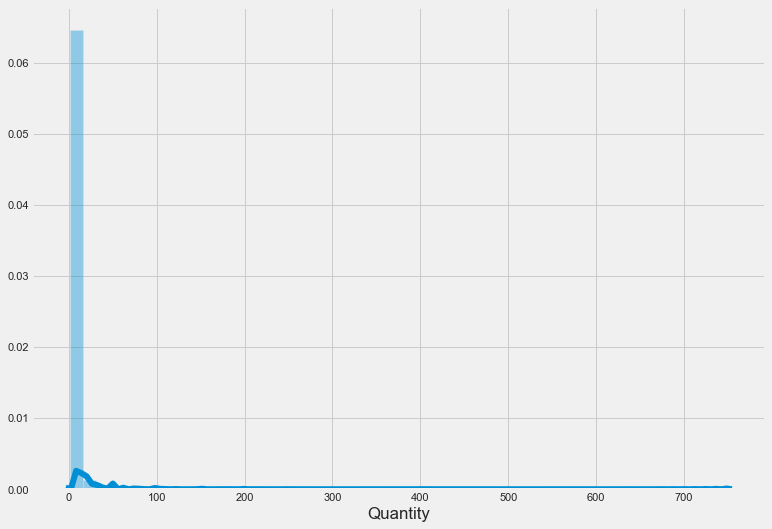

In [200]:
# numerical attributes visualization
sns.distplot(df["Quantity"]);

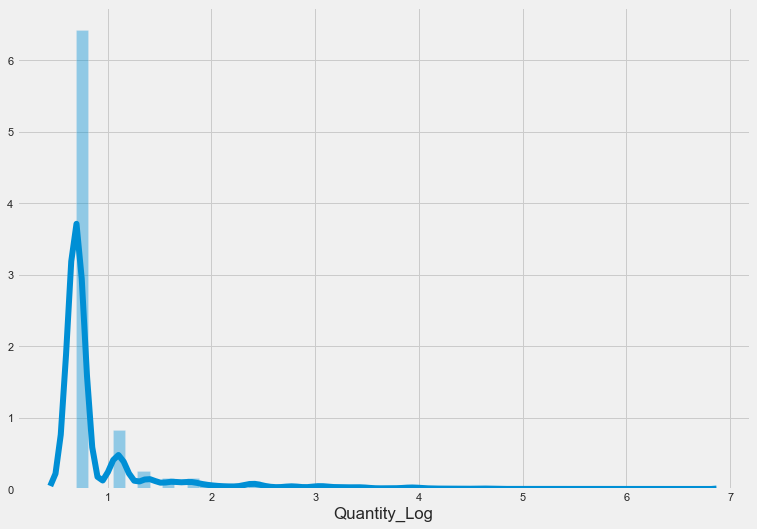

In [201]:
# apply log transformation to the attribute
df['Quantity_Log'] = np.log(df['Quantity']+1)
sns.distplot(df["Quantity_Log"]);

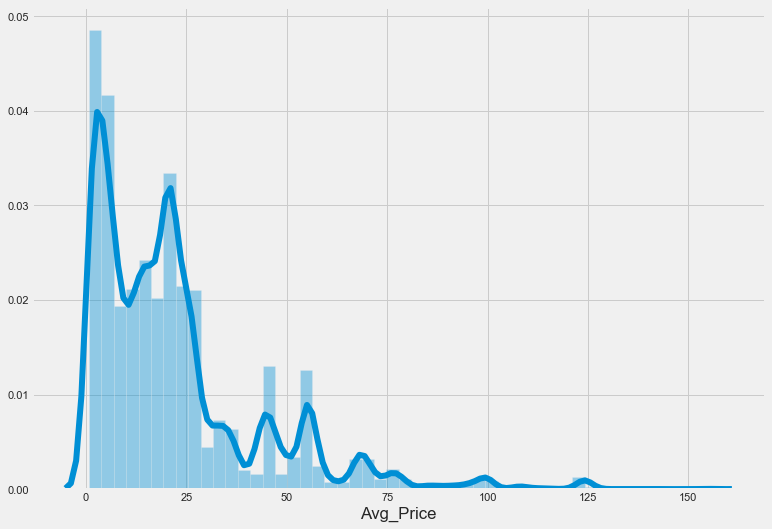

In [203]:
# numerical attributes visualization
sns.distplot(df["Avg_Price"]);

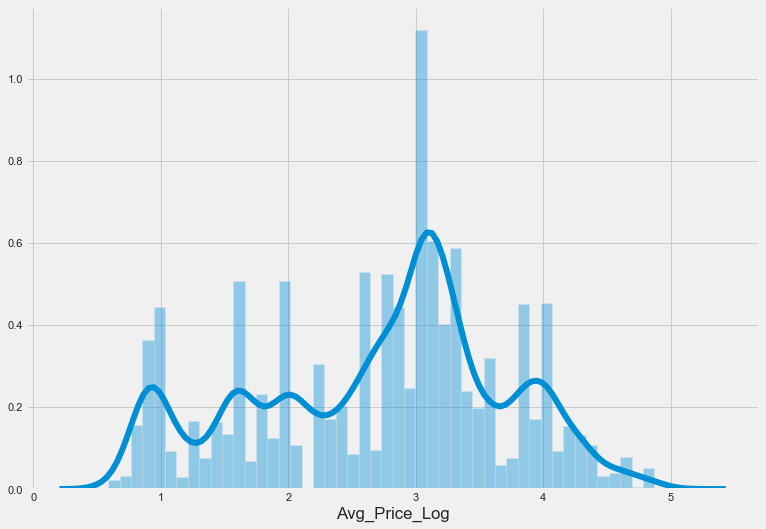

In [204]:
# apply log transformation to the attribute
df['Avg_Price_Log'] = np.log(df['Avg_Price']+1)
sns.distplot(df["Avg_Price_Log"]);

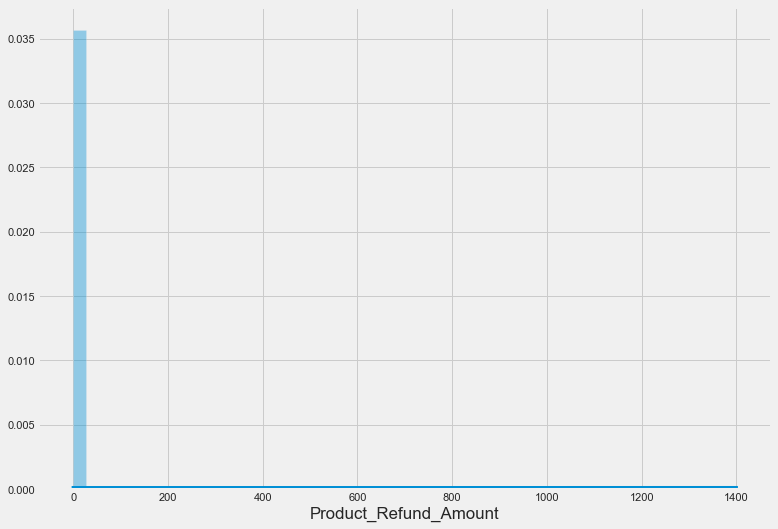

In [205]:
# numerical attributes visualization
sns.distplot(df["Product_Refund_Amount"]);

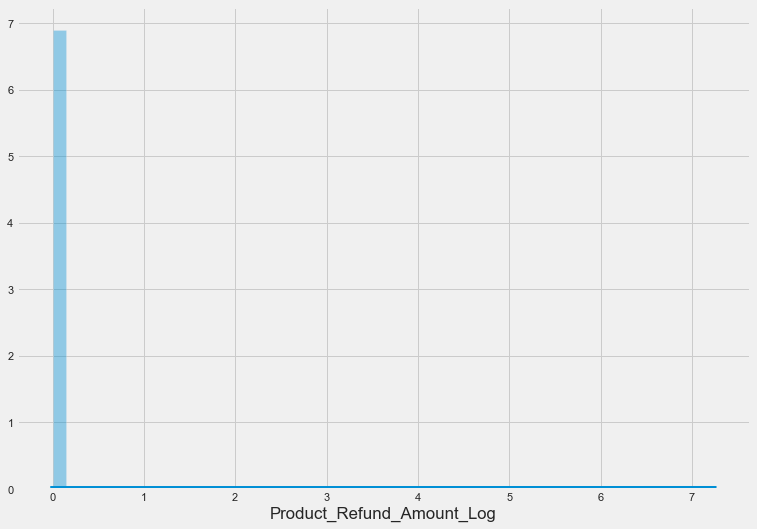

In [206]:
# apply log transformation to the attribute
df['Product_Refund_Amount_Log'] = np.log(df['Product_Refund_Amount']+1)
sns.distplot(df["Product_Refund_Amount_Log"]);

### Bivariate Analysis

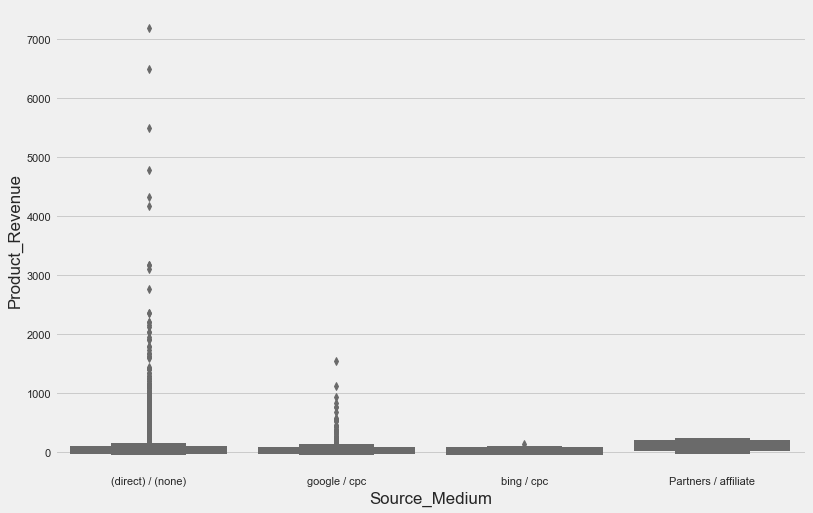

In [207]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df.Source_Medium, y = df.Product_Revenue, palette='Set3')

# The mean of Source_Medium for Direct Source is the highest when compared with other sources.

The value of Refund_Product_Revenue generated by direct / none is higher than any other sources

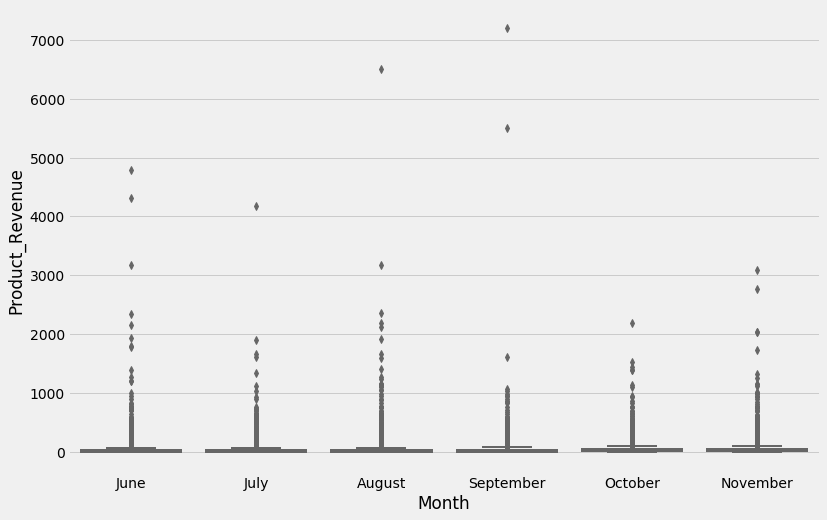

In [60]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df.Month, y = df.Product_Revenue, palette='Set3')

# November is the month where we have noticed highest Product_Revenue, when compared with other months.

The value of Product_Revenue generated by November is slightly higher than any other Month

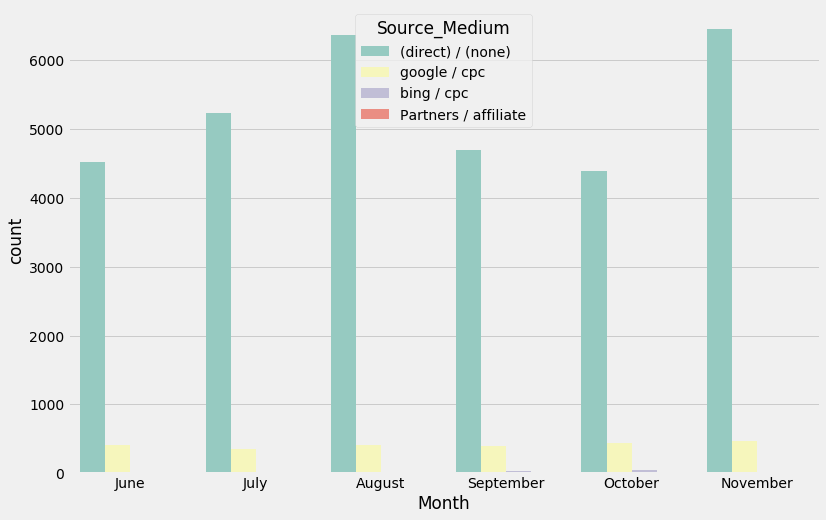

In [63]:
plt.figure(figsize=(12,8))
sns.countplot(x=df.Month, hue=df.Source_Medium, palette='Set3')

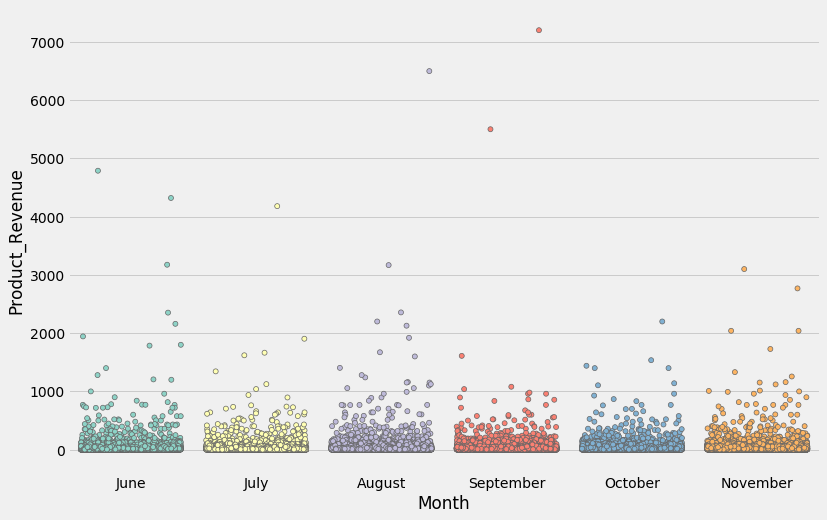

In [64]:
plt.figure(figsize=(12,8))
sns.stripplot(x=df.Month, y = df.Product_Revenue, palette='Set3',linewidth=0.7, jitter=0.4)

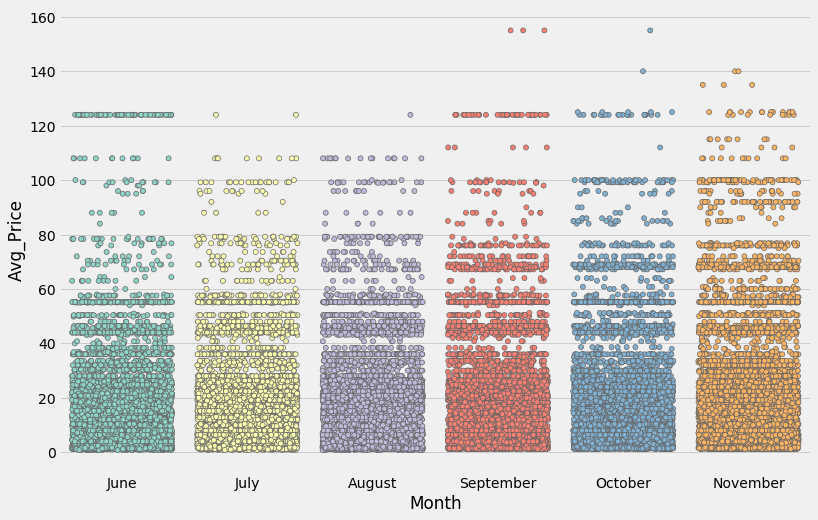

In [93]:
plt.figure(figsize=(12,8))
sns.stripplot(x=df.Month, y = df.Avg_Price, palette='Set3',linewidth=0.7, jitter=0.4)

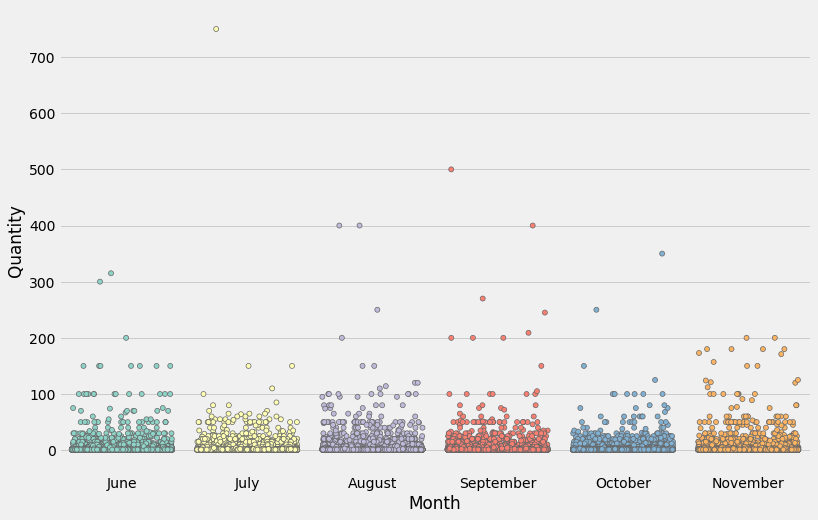

In [96]:
plt.figure(figsize=(12,8))
sns.stripplot(x=df.Month, y = df.Quantity, palette='Set3',linewidth=0.7, jitter=0.4)

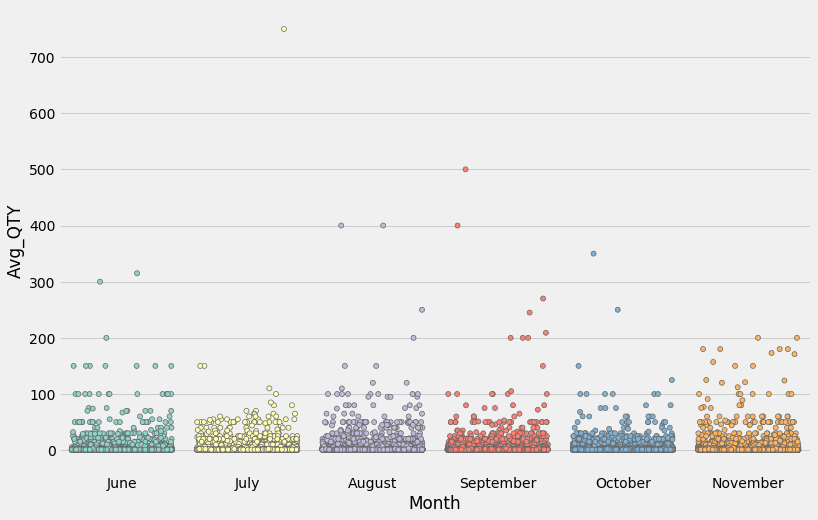

In [95]:
plt.figure(figsize=(12,8))
sns.stripplot(x=df.Month, y = df.Avg_QTY, palette='Set3',linewidth=0.7, jitter=0.4)

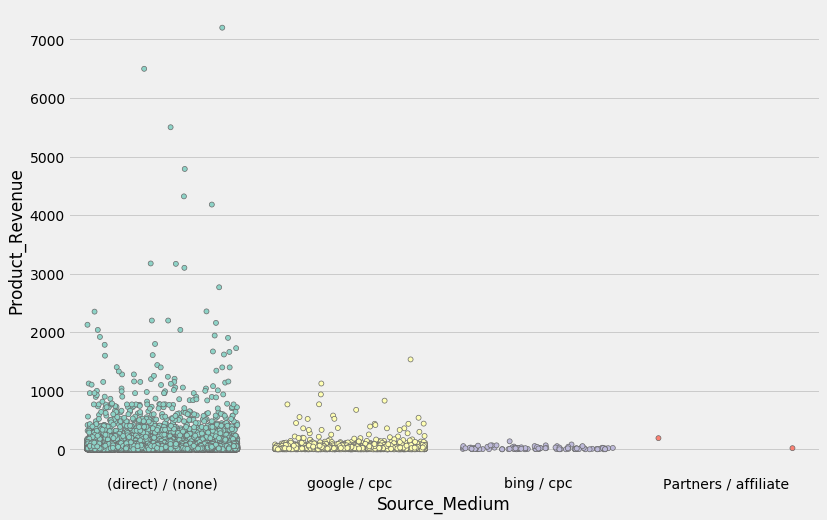

In [98]:
plt.figure(figsize=(12,8))
sns.stripplot(x=df.Source_Medium, y = df.Product_Revenue, palette='Set3',linewidth=0.7, jitter=0.4)

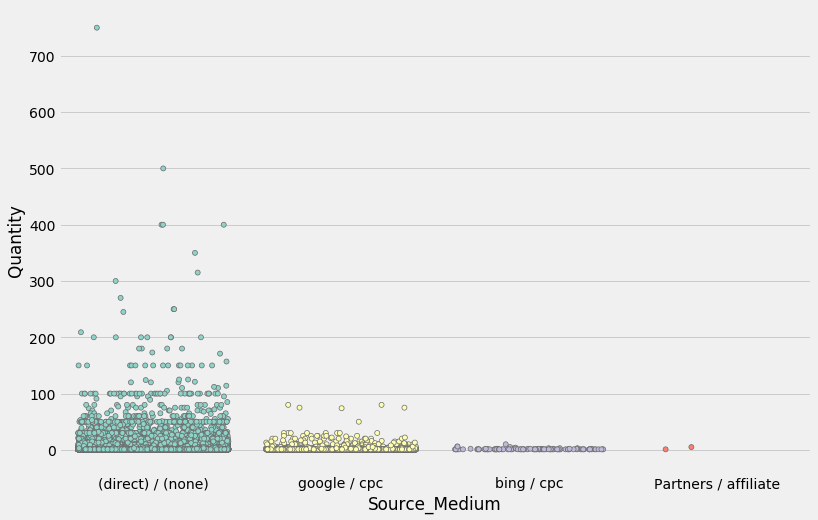

In [100]:
plt.figure(figsize=(12,8))
sns.stripplot(x=df.Source_Medium, y = df.Quantity, palette='Set3',linewidth=0.7, jitter=0.4)

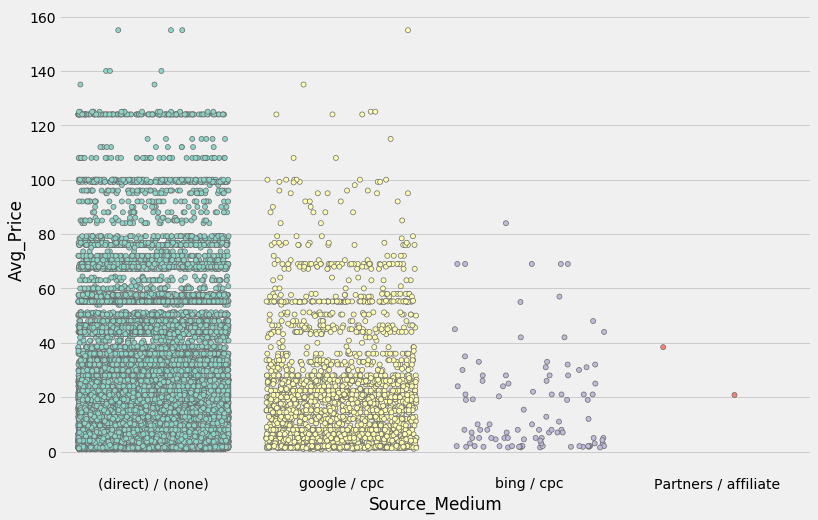

In [101]:
plt.figure(figsize=(12,8))
sns.stripplot(x=df.Source_Medium, y = df.Avg_Price, palette='Set3',linewidth=0.7, jitter=0.4)

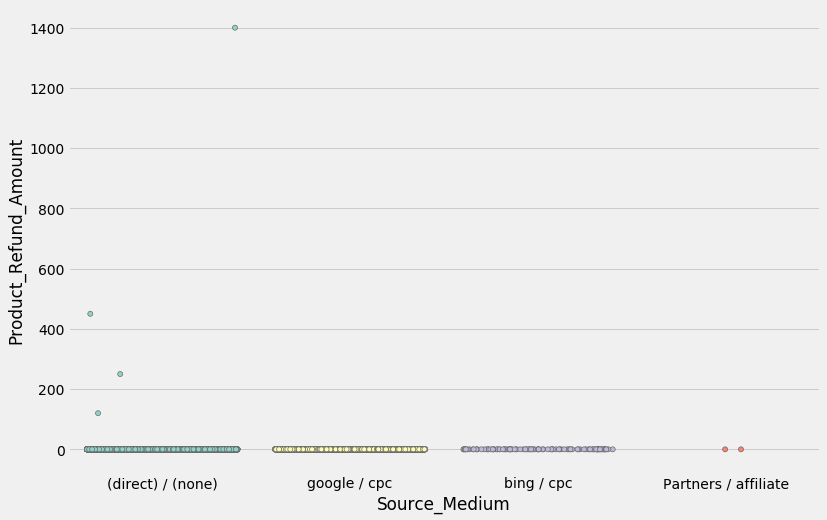

In [102]:
plt.figure(figsize=(12,8))
sns.stripplot(x=df.Source_Medium, y = df.Product_Refund_Amount, palette='Set3',linewidth=0.7, jitter=0.4)

#### Correlation of all Columns

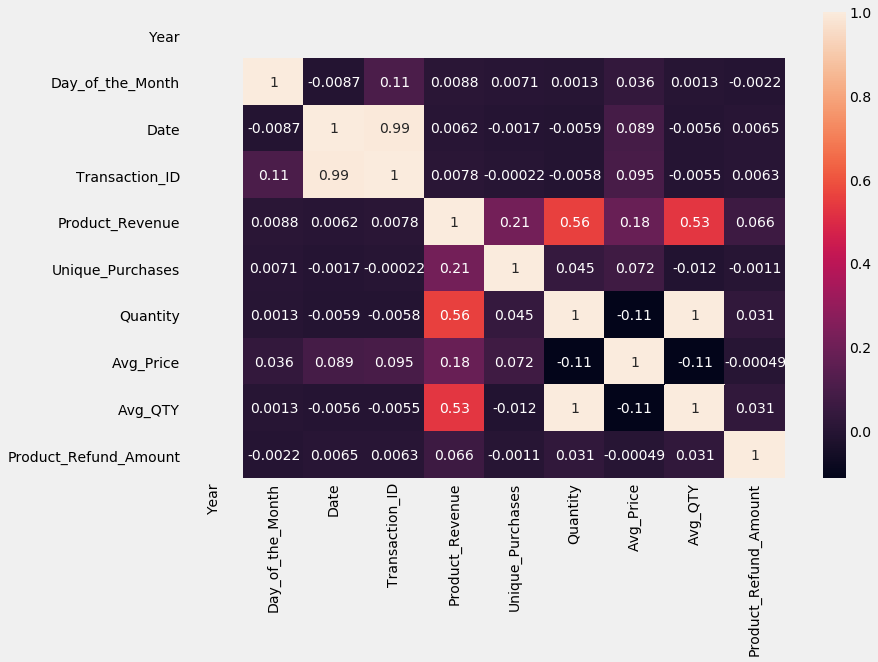

In [97]:
fig=plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

##### Question 1 - What was the best month for sales? How much was earned that month?

In [104]:
df.groupby('Month').sum()

Year  Day_of_the_Month          Date  Transaction_ID  \
Month                                                                 
August     13688940            103759  136894919759      2686093962   
July       11327244             94954  113276456354      2170515872   
June        9986658             75345   99869618745      1865195391   
November   14012460             94775  140132317775      2976571261   
October     9877470             78791   98779663791      2047059116   
September  10372860             84282  103733301282      2093336756   

           Product_Revenue  Unique_Purchases  Quantity  Avg_Price  Avg_QTY  \
Month                                                                        
August           255763.82              6985     20849  131492.34    20399   
July             202786.02              5853     15959  112706.46    15435   
June             209621.70              5143     15996  103238.72    15621   
November         287261.07              7198     19991  174196.62    19503   
October          197919.41              5095     14304  116230.59    13928   
September        205303.20              5320     16437  114439.78    16096   

           Product_Refund_Amount  
Month                             
August                         0  
July                           0  
June                           0  
November                       0  
October                     2220  
September                      0

##### Visualizing our Results

In [111]:
df.groupby('Product').sum()

Year  Day_of_the_Month  \
Product                                                               
#IamRemarkable Ladies T-Shirt              127386               995   
#IamRemarkable Pen                          16176                91   
#IamRemarkable Tote                         28308               147   
#IamRemarkable Unisex Hoodie                52572               447   
#IamRemarkable Unisex T-Shirt               76836               453   
...                                           ...               ...   
YouTube Tie-Dye Woven Socks                 24264               139   
YouTube Transmission Bottle Black            4044                13   
YouTube Ultralight Embroidered Sweatshirt  111210               863   
YouTube Zipper Pull                        105144               802   
Young Stan Goes Ice-Skating                 28308               233   

                                                 Date  Transaction_ID  \
Product                                                                 
#IamRemarkable Ladies T-Shirt              1273910095        24928166   
#IamRemarkable Pen                          161764991         3021843   
#IamRemarkable Tote                         283091847         5591060   
#IamRemarkable Unisex Hoodie                525744247        10680910   
#IamRemarkable Unisex T-Shirt               768387153        14688043   
...                                               ...             ...   
YouTube Tie-Dye Woven Socks                 242650339         4820858   
YouTube Transmission Bottle Black            40441213          750067   
YouTube Ultralight Embroidered Sweatshirt  1112148163        22232018   
YouTube Zipper Pull                        1051485802        21045752   
Young Stan Goes Ice-Skating                 283095633         6031105   

                                           Product_Revenue  Unique_Purchases  \
Product                                                                        
#IamRemarkable Ladies T-Shirt                       720.00                67   
#IamRemarkable Pen                                  103.95                 8   
#IamRemarkable Tote                                 416.00                14   
#IamRemarkable Unisex Hoodie                        902.40                30   
#IamRemarkable Unisex T-Shirt                       926.40                48   
...                                                    ...               ...   
YouTube Tie-Dye Woven Socks                         799.20                12   
YouTube Transmission Bottle Black                    21.60                 2   
YouTube Ultralight Embroidered Sweatshirt          2923.20                57   
YouTube Zipper Pull                                 531.00                52   
Young Stan Goes Ice-Skating                         264.00                14   

                                           Quantity  Avg_Price  Avg_QTY  \
Product                                                                   
#IamRemarkable Ladies T-Shirt                    73      624.0       68   
#IamRemarkable Pen                               66       11.9       66   
#IamRemarkable Tote                              64       92.8       64   
#IamRemarkable Unisex Hoodie                     34      691.2       30   
#IamRemarkable Unisex T-Shirt                    84      391.2       52   
...                                             ...        ...      ...   
YouTube Tie-Dye Woven Socks                      55      180.0       55   
YouTube Transmission Bottle Black                 2       21.6        2   
YouTube Ultralight Embroidered Sweatshirt        61     2633.2       58   
YouTube Zipper Pull                             123      233.0      123   
Young Stan Goes Ice-Skating                      16      228.0       16   

                                           Product_Refund_Amount  
Product                                                           
#IamRemarkable Ladie

In [108]:
results2 = df.groupby('Product').sum()
results2

Year  Day_of_the_Month  \
Product                                                               
#IamRemarkable Ladies T-Shirt              127386               995   
#IamRemarkable Pen                          16176                91   
#IamRemarkable Tote                         28308               147   
#IamRemarkable Unisex Hoodie                52572               447   
#IamRemarkable Unisex T-Shirt               76836               453   
...                                           ...               ...   
YouTube Tie-Dye Woven Socks                 24264               139   
YouTube Transmission Bottle Black            4044                13   
YouTube Ultralight Embroidered Sweatshirt  111210               863   
YouTube Zipper Pull                        105144               802   
Young Stan Goes Ice-Skating                 28308               233   

                                                 Date  Transaction_ID  \
Product                                                                 
#IamRemarkable Ladies T-Shirt              1273910095        24928166   
#IamRemarkable Pen                          161764991         3021843   
#IamRemarkable Tote                         283091847         5591060   
#IamRemarkable Unisex Hoodie                525744247        10680910   
#IamRemarkable Unisex T-Shirt               768387153        14688043   
...                                               ...             ...   
YouTube Tie-Dye Woven Socks                 242650339         4820858   
YouTube Transmission Bottle Black            40441213          750067   
YouTube Ultralight Embroidered Sweatshirt  1112148163        22232018   
YouTube Zipper Pull                        1051485802        21045752   
Young Stan Goes Ice-Skating                 283095633         6031105   

                                           Product_Revenue  Unique_Purchases  \
Product                                                                        
#IamRemarkable Ladies T-Shirt                       720.00                67   
#IamRemarkable Pen                                  103.95                 8   
#IamRemarkable Tote                                 416.00                14   
#IamRemarkable Unisex Hoodie                        902.40                30   
#IamRemarkable Unisex T-Shirt                       926.40                48   
...                                                    ...               ...   
YouTube Tie-Dye Woven Socks                         799.20                12   
YouTube Transmission Bottle Black                    21.60                 2   
YouTube Ultralight Embroidered Sweatshirt          2923.20                57   
YouTube Zipper Pull                                 531.00                52   
Young Stan Goes Ice-Skating                         264.00                14   

                                           Quantity  Avg_Price  Avg_QTY  \
Product                                                                   
#IamRemarkable Ladies T-Shirt                    73      624.0       68   
#IamRemarkable Pen                               66       11.9       66   
#IamRemarkable Tote                              64       92.8       64   
#IamRemarkable Unisex Hoodie                     34      691.2       30   
#IamRemarkable Unisex T-Shirt                    84      391.2       52   
...                                             ...        ...      ...   
YouTube Tie-Dye Woven Socks                      55      180.0       55   
YouTube Transmission Bottle Black                 2       21.6        2   
YouTube Ultralight Embroidered Sweatshirt        61     2633.2       58   
YouTube Zipper Pull                             123      233.0      123   
Young Stan Goes Ice-Skating                      16      228.0       16   

                                           Product_Refund_Amount  
Product                                                           
#IamRemarkable Ladie

#### Task 3: Aggregate the period day_of_the_month for distribution

#### Which day should we display advertisements to maximize likelihood of customer’s buying product?

In [113]:
results3 = df.groupby(['Day_of_the_Month']).count()
results3

Year  Month  Date  Product  Source  Medium  Source_Medium  \
Day_of_the_Month                                                              
1                 1520   1520  1520     1520    1520    1520           1520   
2                 1190   1190  1190     1190    1190    1190           1190   
3                 1307   1307  1307     1307    1307    1307           1307   
4                 1222   1222  1222     1222    1222    1222           1222   
5                  941    941   941      941     941     941            941   
6                 1168   1168  1168     1168    1168    1168           1168   
7                 1325   1325  1325     1325    1325    1325           1325   
8                 1173   1173  1173     1173    1173    1173           1173   
9                 1371   1371  1371     1371    1371    1371           1371   
10                1104   1104  1104     1104    1104    1104           1104   
11                 963    963   963      963     963     963            963   
12                1113   1113  1113     1113    1113    1113           1113   
13                1022   1022  1022     1022    1022    1022           1022   
14                 951    951   951      951     951     951            951   
15                1000   1000  1000     1000    1000    1000           1000   
16                 759    759   759      759     759     759            759   
17                 883    883   883      883     883     883            883   
18                1094   1094  1094     1094    1094    1094           1094   
19                 915    915   915      915     915     915            915   
20                1067   1067  1067     1067    1067    1067           1067   
21                1211   1211  1211     1211    1211    1211           1211   
22                1277   1277  1277     1277    1277    1277           1277   
23                 995    995   995      995     995     995            995   
24                 888    888   888      888     888     888            888   
25                1001   1001  1001     1001    1001    1001           1001   
26                1116   1116  1116     1116    1116    1116           1116   
27                1322   1322  1322     1322    1322    1322           1322   
28                1552   1552  1552     1552    1552    1552           1552   
29                1256   1256  1256     1256    1256    1256           1256   
30                1062   1062  1062     1062    1062    1062           1062   
31                 488    488   488      488     488     488            488   

                  Transaction_ID  Product_Revenue  Unique_Purchases  Quantity  \
Day_of_the_Month                                                                
1                           1520             1520              1520      1520   
2                           1190             1190              1190      1190   
3                           1307             1307              1307      1307   
4                           1222             1222              1222      1222   
5                            941              941               941       941   
6                           1168             1168              1168      1168   
7                           1325             1325              1325      1325   
8                           1173             1173              1173      1173   
9                           1371             1371              1371      1371   
10                          1104             1104              1104      1104   
11                           963              963               963       963   
12                          1113             1113              1113      1113   
13                          1022             1022              1022      1022   
14                           951              951               951       951   
15                          1000             1000              1000      1000   
16                           759 

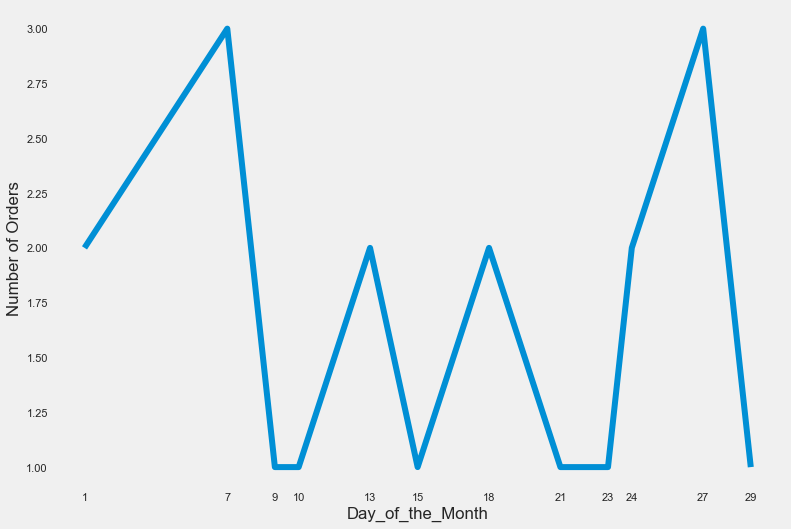

In [244]:
#plotting

results3 = df.groupby(['Day_of_the_Month'])['Quantity'].count()
Day_of_the_Month = [Day_of_the_Month for Day_of_the_Month, df1 in df.groupby('Day_of_the_Month')]

sns.lineplot(Day_of_the_Month, results3)
plt.xticks(Day_of_the_Month)
plt.xlabel('Day_of_the_Month')
plt.ylabel('Number of Orders')
plt.grid()

plt.show()

As you can see from the above figure, there are approximately 2 peaks at the data. They are 28 and 1. It makes sense since most people shopping during the end of the month and 1st day of every month. From this data, we can suggest to our bussiness partner to advertise their product right before 28th day of the month or 1st day of the month. It could be 27 and/or 30 or 31.

#### Question 4 What Products Are Most Often Sold Together?
We’re gonna take a look to our top 10 data as usual.

In [129]:
df.head()

Year Month  Day_of_the_Month      Date                         Product  \
0  2022  June                 1  20220601   #IamRemarkable Unisex T-Shirt   
1  2022  June                 1  20220601       Android Commuter Backpack   
2  2022  June                 1  20220601       Android Commuter Backpack   
3  2022  June                 1  20220601          Android Lumberjack Pin   
4  2022  June                 1  20220601  Android SM S/F18 Sticker Sheet   

   Source Medium      Source_Medium  Transaction_ID  Product_Revenue  \
0  direct   none  (direct) / (none)          373524             9.60   
1  direct   none  (direct) / (none)          373573            48.00   
2  direct   none  (direct) / (none)          373585            48.00   
3  direct   none  (direct) / (none)          373606             4.48   
4  direct   none  (direct) / (none)          373270             1.68   

   Unique_Purchases  Quantity  Avg_Price  Avg_QTY  Product_Refund_Amount  \
0                 1         1       9.60        1                      0   
1                 1         1      48.00        1                      0   
2                 1         1      48.00        1                      0   
3                 1         1       4.48        1                      0   
4                 1         1       1.68        1                      0   

  Date_updated  
0  2022-June-1  
1  2022-June-1  
2  2022-June-1  
3  2022-June-1  
4  2022-June-1

We can see that “Transaction ID” indicate the transaction. So by grouping the product by the Transaction ID, we are able to know what products are often sold together. We’re gonna use .duplicated() method to find a duplicate values of “Transaction ID”.

#### Task 4: Make a new column call "Product Bundle"

In [151]:
# Creating a new Dataframe to separate the duplicated values of Transaction ID

new_df = df[df['Transaction_ID'].duplicated(keep=False)]
new_df.head(20)

Year Month  Day_of_the_Month      Date                            Product  \
0   2022  June                 1  20220601      #IamRemarkable Unisex T-Shirt   
1   2022  June                 1  20220601          Android Commuter Backpack   
2   2022  June                 1  20220601          Android Commuter Backpack   
3   2022  June                 1  20220601             Android Lumberjack Pin   
4   2022  June                 1  20220601     Android SM S/F18 Sticker Sheet   
5   2022  June                 1  20220601               Android Striped Sock   
6   2022  June                 1  20220601       Android Techie 3D Framed Art   
7   2022  June                 1  20220601                     Ball of Whacks   
8   2022  June                 1  20220601                     Ball of Whacks   
9   2022  June                 1  20220601       Chrome Dino Marine Layer Tee   
10  2022  June                 1  20220601           Chrome Dino Recycled Cap   
11  2022  June                 1  20220601           Chrome Dino Recycled Cap   
12  2022  June                 1  20220601            Chrome Dino Zipper Pull   
13  2022  June                 1  20220601            For Everyone Google Tee   
14  2022  June                 1  20220601            For Everyone Google Tee   
15  2022  June                 1  20220601            For Everyone Google Tee   
17  2022  June                 1  20220601        Google ApPeel Journal Black   
18  2022  June                 1  20220601        Google Austin Campus Bottle   
19  2022  June                 1  20220601  Google Bamboo Lid Recycled Bottle   
20  2022  June                 1  20220601         Google Bamboo Phone Holder   

    Source Medium      Source_Medium  Transaction_ID  Product_Revenue  \
0   direct   none  (direct) / (none)          373524             9.60   
1   direct   none  (direct) / (none)          373573            48.00   
2   direct   none  (direct) / (none)          373585            48.00   
3   direct   none  (direct) / (none)          373606             4.48   
4   direct   none  (direct) / (none)          373270             1.68   
5   direct   none  (direct) / (none)          373325            14.40   
6   direct   none  (direct) / (none)          373604            16.00   
7   direct   none  (direct) / (none)          373322           140.00   
8   direct   none  (direct) / (none)          373630           280.00   
9   direct   none  (direct) / (none)          373401           288.00   
10  direct   none  (direct) / (none)          373606            16.80   
11  direct   none  (direct) / (none)          373677            16.80   
12  direct   none  (direct) / (none)          373602             5.00   
13  direct   none  (direct) / (none)          373301            25.60   
14  direct   none  (direct) / (none)          373384            25.60   
15  direct   none  (direct) / (none)          373423            32.00   
17  direct   none  (direct) / (none)          373540           160.00   
18  direct   none  (direct) / (none)          373258            11.20   
19  direct   none  (direct) / (none)          373501            72.00   
20  direct   none  (direct) / (none)          373604             4.00   

    Unique_Purchases  Quantity  Avg_Price  Avg_QTY  Product_Refund_Amount  \
0                  1         1       9.60        1                      0   
1                  1         1      48.00        1                      0   
2                  1         1      48.00        1                      0   
3                  1         1       4.48        1                      0   
4                  1         1       1.68        1                      0   
5                  1         1      14.40        1                      0   
6                  1         1      16.00        1                      0   
7                  1         4      35.00        4                      0   
8                  1        10      28.00       10                      0  

Now we want to create a column called “Product Bundle” that contain example Chrome Dino Recycled Cap and Android Lumberjack Pin (transaction 373606) at the same line. We’re gonna use the .transform() method to join values from two rows into a single row.

In [155]:
# Creating a new Dataframe to separate the duplicated values of Transaction ID
new_df = df[df['Transaction_ID'].duplicated(keep=False)]


#Joining few products with the same transaction_id into the same line
new_df['Product_Bundle'] = new_df.groupby('Transaction_ID')['Product'].transform(lambda x: ','.join(x))
new_df.head(20)

Year Month  Day_of_the_Month      Date                            Product  \
0   2022  June                 1  20220601      #IamRemarkable Unisex T-Shirt   
1   2022  June                 1  20220601          Android Commuter Backpack   
2   2022  June                 1  20220601          Android Commuter Backpack   
3   2022  June                 1  20220601             Android Lumberjack Pin   
4   2022  June                 1  20220601     Android SM S/F18 Sticker Sheet   
5   2022  June                 1  20220601               Android Striped Sock   
6   2022  June                 1  20220601       Android Techie 3D Framed Art   
7   2022  June                 1  20220601                     Ball of Whacks   
8   2022  June                 1  20220601                     Ball of Whacks   
9   2022  June                 1  20220601       Chrome Dino Marine Layer Tee   
10  2022  June                 1  20220601           Chrome Dino Recycled Cap   
11  2022  June                 1  20220601           Chrome Dino Recycled Cap   
12  2022  June                 1  20220601            Chrome Dino Zipper Pull   
13  2022  June                 1  20220601            For Everyone Google Tee   
14  2022  June                 1  20220601            For Everyone Google Tee   
15  2022  June                 1  20220601            For Everyone Google Tee   
17  2022  June                 1  20220601        Google ApPeel Journal Black   
18  2022  June                 1  20220601        Google Austin Campus Bottle   
19  2022  June                 1  20220601  Google Bamboo Lid Recycled Bottle   
20  2022  June                 1  20220601         Google Bamboo Phone Holder   

    Source Medium      Source_Medium  Transaction_ID  Product_Revenue  \
0   direct   none  (direct) / (none)          373524             9.60   
1   direct   none  (direct) / (none)          373573            48.00   
2   direct   none  (direct) / (none)          373585            48.00   
3   direct   none  (direct) / (none)          373606             4.48   
4   direct   none  (direct) / (none)          373270             1.68   
5   direct   none  (direct) / (none)          373325            14.40   
6   direct   none  (direct) / (none)          373604            16.00   
7   direct   none  (direct) / (none)          373322           140.00   
8   direct   none  (direct) / (none)          373630           280.00   
9   direct   none  (direct) / (none)          373401           288.00   
10  direct   none  (direct) / (none)          373606            16.80   
11  direct   none  (direct) / (none)          373677            16.80   
12  direct   none  (direct) / (none)          373602             5.00   
13  direct   none  (direct) / (none)          373301            25.60   
14  direct   none  (direct) / (none)          373384            25.60   
15  direct   none  (direct) / (none)          373423            32.00   
17  direct   none  (direct) / (none)          373540           160.00   
18  direct   none  (direct) / (none)          373258            11.20   
19  direct   none  (direct) / (none)          373501            72.00   
20  direct   none  (direct) / (none)          373604             4.00   

    Unique_Purchases  Quantity  Avg_Price  Avg_QTY  Product_Refund_Amount  \
0                  1         1       9.60        1                      0   
1                  1         1      48.00        1                      0   
2                  1         1      48.00        1                      0   
3                  1         1       4.48        1                      0   
4                  1         1       1.68        1                      0   
5                  1         1      14.40        1                      0   
6                  1         1      16.00        1                      0   
7                  1         4      35.00        4                      0   
8                  1        10      28.00       10                      0  

It’s good, but we have an issue here. We have the same order at least twice because we did merge them in every situation in groupby without dropping the duplicate values. Now let’s drop the rows with duplicate values.

In [156]:
#Dropping the duplicate values

new_df = new_df[['Transaction_ID','Product_Bundle']].drop_duplicates()

new_df.head()

Transaction_ID                                     Product_Bundle
0          373524  #IamRemarkable Unisex T-Shirt,Google Cloud Cap...
1          373573  Android Commuter Backpack,Google Cork Pencil P...
2          373585  Android Commuter Backpack,Google Constellation...
3          373606    Android Lumberjack Pin,Chrome Dino Recycled Cap
4          373270  Android SM S/F18 Sticker Sheet,Google Laptop a...

Now, we need to count the pair of products. We need new libraries because they have all we need to count all the combination of products bundle. We’re gonna use itertools and collections libraries.

#### Task 5: Counting the Product bundles

In [159]:
#Importing the libraries 
from itertools import combinations
from collections import Counter

count = Counter()


for row in new_df['Product_Bundle']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2))) #Counting all the 2 products bundle
print(count)

Counter({('Google Classic White Organic F/C Tee', 'Google Unisex Eco Tee Black'): 93, ('Google Oatmeal  Bear Ear Baby Hat', 'Google Oatmeal Bandana Bib'): 75, ('Google Blue Kids Sunglasses', 'Google Red Kids Sunglasses'): 74, ('Google Blue Canvas Pouch', 'Google Green Canvas Pouch'): 74, ('Google Blue Canvas Pouch', 'Google Red Canvas Pouch'): 73, ('Google Unisex Eco Tee Black', "Google Women's Eco Tee Black"): 73, ('Google Inspired Blue Notebook', 'Google Inspired Red Notebook'): 67, ('Google Inspired Red Notebook', 'Google Inspired Yellow Notebook'): 65, ('Google Black Eco Zip Hoodie', 'Google Unisex Eco Tee Black'): 64, ('Google Green Canvas Pouch', 'Google Red Canvas Pouch'): 62, ('Google Inspired Blue Notebook', 'Google Inspired Yellow Notebook'): 62, ('Google Blue Canvas Pouch', 'Google Yellow Canvas Pouch'): 61, ('Google Green Canvas Pouch', 'Google Yellow Canvas Pouch'): 61, ('Google Red Canvas Pouch', 'Google Yellow Canvas Pouch'): 61, ('For Everyone Google Tee', 'Google Unise

#### It’s too messy, let’s just showing the top 10 data

In [160]:
#Importing the libraries 
from itertools import combinations
from collections import Counter

count = Counter()


for row in new_df['Product_Bundle']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2))) #Counting all the 2 products bundle
count.most_common(10)

[(('Google Classic White Organic F/C Tee', 'Google Unisex Eco Tee Black'), 93),
 (('Google Oatmeal  Bear Ear Baby Hat', 'Google Oatmeal Bandana Bib'), 75),
 (('Google Blue Kids Sunglasses', 'Google Red Kids Sunglasses'), 74),
 (('Google Blue Canvas Pouch', 'Google Green Canvas Pouch'), 74),
 (('Google Blue Canvas Pouch', 'Google Red Canvas Pouch'), 73),
 (('Google Unisex Eco Tee Black', "Google Women's Eco Tee Black"), 73),
 (('Google Inspired Blue Notebook', 'Google Inspired Red Notebook'), 67),
 (('Google Inspired Red Notebook', 'Google Inspired Yellow Notebook'), 65),
 (('Google Black Eco Zip Hoodie', 'Google Unisex Eco Tee Black'), 64),
 (('Google Green Canvas Pouch', 'Google Red Canvas Pouch'), 62)]

Now we can clearly see that the most often products sold together are 'Google Classic White Organic F/C Tee' and 'Google Unisex Eco Tee Black' with 93 transactions.

We could count the 3 product bundles by just changing the count.update index into 3.

In [163]:
#Importing the libraries 
from itertools import combinations
from collections import Counter

count = Counter()


for row in new_df['Product_Bundle']:
    row_list = row.split(',')
    #count.update(Counter(combinations(row_list,2))) #Counting all the 2 products bundle
    count.update(Counter(combinations(row_list,3))) #Counting all the 3 products bundle
count.most_common(10)

[(('Google Blue Canvas Pouch',
   'Google Green Canvas Pouch',
   'Google Red Canvas Pouch'),
  55),
 (('Google Inspired Blue Notebook',
   'Google Inspired Red Notebook',
   'Google Inspired Yellow Notebook'),
  55),
 (('Google Blue Canvas Pouch',
   'Google Green Canvas Pouch',
   'Google Yellow Canvas Pouch'),
  54),
 (('Google Blue Canvas Pouch',
   'Google Red Canvas Pouch',
   'Google Yellow Canvas Pouch'),
  53),
 (('Google Green Canvas Pouch',
   'Google Red Canvas Pouch',
   'Google Yellow Canvas Pouch'),
  50),
 (('Google Inspired Blue Notebook',
   'Google Inspired Green Notebook',
   'Google Inspired Red Notebook'),
  50),
 (('Google Inspired Green Notebook',
   'Google Inspired Red Notebook',
   'Google Inspired Yellow Notebook'),
  48),
 (('Google Inspired Blue Notebook',
   'Google Inspired Green Notebook',
   'Google Inspired Yellow Notebook'),
  46),
 (('Google Ombre Lime Pen',
   'Google Ombre Purple Pen',
   'Google Ombre Yellow Pen'),
  41),
 (('Google Inspired Blue

We can see the most often sold products (3 products) together are 'Google Blue Canvas Pouch', 'Google Green Canvas Pouch', and 'Google Red Canvas Pouch' with 55 transactions. It’s not really significant compare to the 2-Product Bundle. So we’re gonna ignore the 3-Product bundle.

#### 5. What product sold the most? Why do you think it did?

We need to sum up the “Quantity Ordered” based on grouping the Product. So let’s do it.

#### Task 6: Grouping by the Product

In [164]:
product_group = df.groupby('Product')
product_group.sum()

Year  Day_of_the_Month  \
Product                                                               
#IamRemarkable Ladies T-Shirt              127386               995   
#IamRemarkable Pen                          16176                91   
#IamRemarkable Tote                         28308               147   
#IamRemarkable Unisex Hoodie                52572               447   
#IamRemarkable Unisex T-Shirt               76836               453   
...                                           ...               ...   
YouTube Tie-Dye Woven Socks                 24264               139   
YouTube Transmission Bottle Black            4044                13   
YouTube Ultralight Embroidered Sweatshirt  111210               863   
YouTube Zipper Pull                        105144               802   
Young Stan Goes Ice-Skating                 28308               233   

                                                 Date  Transaction_ID  \
Product                                                                 
#IamRemarkable Ladies T-Shirt              1273910095        24928166   
#IamRemarkable Pen                          161764991         3021843   
#IamRemarkable Tote                         283091847         5591060   
#IamRemarkable Unisex Hoodie                525744247        10680910   
#IamRemarkable Unisex T-Shirt               768387153        14688043   
...                                               ...             ...   
YouTube Tie-Dye Woven Socks                 242650339         4820858   
YouTube Transmission Bottle Black            40441213          750067   
YouTube Ultralight Embroidered Sweatshirt  1112148163        22232018   
YouTube Zipper Pull                        1051485802        21045752   
Young Stan Goes Ice-Skating                 283095633         6031105   

                                           Product_Revenue  Unique_Purchases  \
Product                                                                        
#IamRemarkable Ladies T-Shirt                       720.00                67   
#IamRemarkable Pen                                  103.95                 8   
#IamRemarkable Tote                                 416.00                14   
#IamRemarkable Unisex Hoodie                        902.40                30   
#IamRemarkable Unisex T-Shirt                       926.40                48   
...                                                    ...               ...   
YouTube Tie-Dye Woven Socks                         799.20                12   
YouTube Transmission Bottle Black                    21.60                 2   
YouTube Ultralight Embroidered Sweatshirt          2923.20                57   
YouTube Zipper Pull                                 531.00                52   
Young Stan Goes Ice-Skating                         264.00                14   

                                           Quantity  Avg_Price  Avg_QTY  \
Product                                                                   
#IamRemarkable Ladies T-Shirt                    73      624.0       68   
#IamRemarkable Pen                               66       11.9       66   
#IamRemarkable Tote                              64       92.8       64   
#IamRemarkable Unisex Hoodie                     34      691.2       30   
#IamRemarkable Unisex T-Shirt                    84      391.2       52   
...                                             ...        ...      ...   
YouTube Tie-Dye Woven Socks                      55      180.0       55   
YouTube Transmission Bottle Black                 2       21.6        2   
YouTube Ultralight Embroidered Sweatshirt        61     2633.2       58   
YouTube Zipper Pull                             123      233.0      123   
Young Stan Goes Ice-Skating                      16      228.0       16   

                                           Product_Refund_Amount  
Product                                                           
#IamRemarkable Ladie

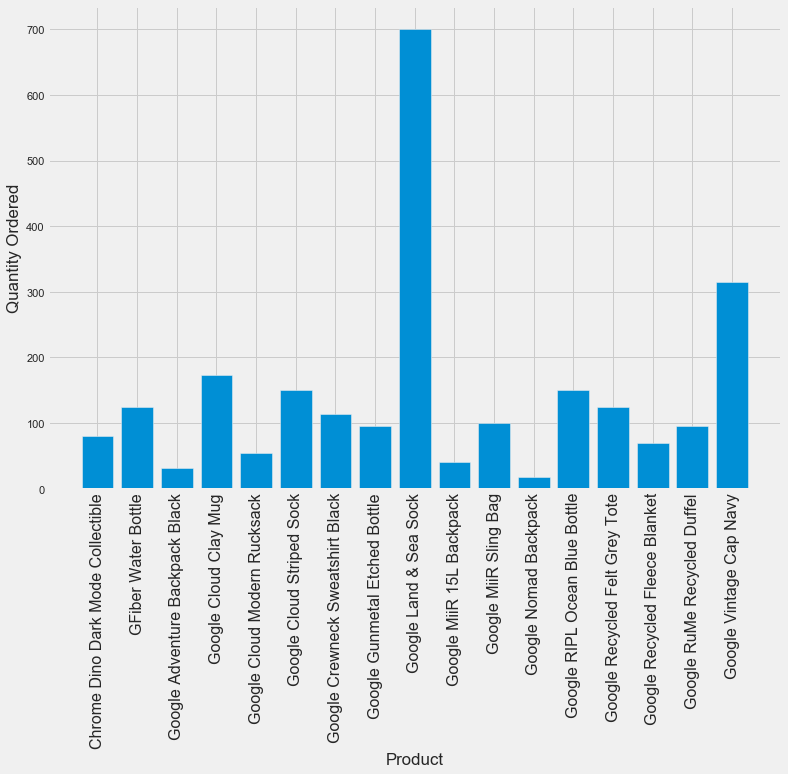

In [246]:
product_group = df.groupby('Product')

product_group.apply(lambda x: x.sort_values(by = 'Quantity', ascending=False))

#Visualizing 

quantity_ordered = product_group.sum()['Quantity']


Products = [Product for Product, df in product_group]

plt.bar(Products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(Products, rotation='vertical', size=16)
plt.show()


##### Overlaying a second y-axis on existing chart

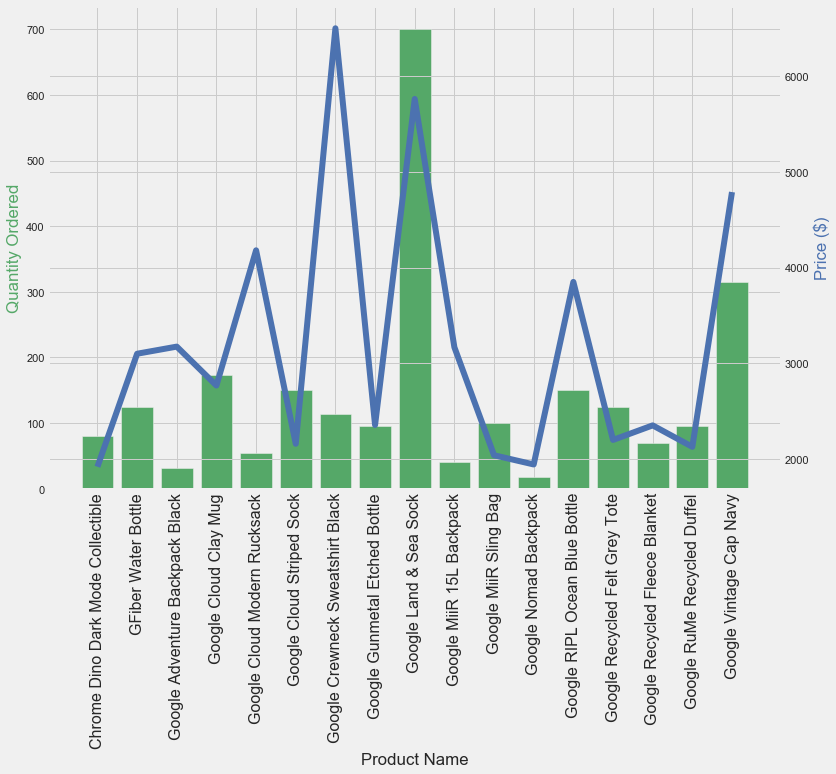

In [233]:
prices = df.groupby('Product').mean()['Product_Revenue']

#prices.apply(lambda x: x.sort_values(by = 'Product_Revenue', ascending=False))

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(Products, quantity_ordered, color='g')
ax2.plot(Products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(Products, rotation='vertical', size=16)

plt.show()

## CONCLUSION

1. What was the best month for sales? How much was earned that month?

The best month for sales is Novebver. The company earned approximately $ 287,261.07

2. Which Source_Medium sold the most product?

Direct is the Source with the highest sales $ 1,271,639.44 

3. What day of the month should we display advertisements to maximize likelihood of customer’s buying products?

We can suggest to advertise the products right before 28 and/or 1 day of the month.

4. What Products are most often sold together?

The most often products sold together are 'Google Classic White Organic F/C Tee' and 'Google Classic White Organic F/C Tee with 93 transactions.

5. What product sold the most? Why do you think it did?

Google Unisex Eco Tee Black is the most sold product. Because it’s cheaper than other products and has high demand.